<a href="https://colab.research.google.com/github/jayV1999/Machine-Learning/blob/main/Jayanth_V_Retail_Sales_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")

import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
warnings.filterwarnings("ignore")

In [4]:
path_1 = "/content/drive/MyDrive/Data Sets/Rossmann Stores Data.csv"
path_2 = "/content/drive/MyDrive/Data Sets/store.csv"

In [5]:
Sales_df = pd.read_csv(path_1)
Store_df = pd.read_csv(path_2)

In [6]:
Sales_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [7]:
Sales_df.size

9154881

In [8]:
Sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [9]:
Sales_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [10]:
Sales_df.astype('object').describe()


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
count,1017209,1017209,1017209,1017209,1017209,1017209,1017209,1017209,1017209
unique,1115,7,942,21734,4086,2,2,5,2
top,1,5,2015-07-31,0,0,1,0,0,0
freq,942,145845,1115,172871,172869,844392,629129,855087,835488


In [11]:

Sales_df['Date'] = pd.to_datetime(Sales_df['Date'])

In [12]:
Sales_df['Month']=Sales_df.Date.dt.month
Sales_df['Year']=Sales_df.Date.dt.year
Sales_df['Day']=Sales_df.Date.dt.day

In [13]:
Sales_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Month,Year,Day
0,1,5,2015-07-31,5263,555,1,1,0,1,7,2015,31
1,2,5,2015-07-31,6064,625,1,1,0,1,7,2015,31
2,3,5,2015-07-31,8314,821,1,1,0,1,7,2015,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,7,2015,31
4,5,5,2015-07-31,4822,559,1,1,0,1,7,2015,31


In [14]:
Store_df.shape

(1115, 10)

In [15]:
Store_df.size

11150

In [16]:
Store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [17]:
Store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [18]:
Store_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [19]:
Store_df.Promo2SinceWeek.fillna(0,inplace=True)
Store_df.Promo2SinceYear.fillna(0,inplace=True)
Store_df.PromoInterval.fillna(0,inplace=True)

In [20]:
print(Store_df.CompetitionOpenSinceMonth.mean())
print(Store_df.CompetitionOpenSinceYear.mean())
print(Store_df.CompetitionDistance.mean())


7.2247043363994745
2008.6688567674114
5404.901079136691


In [21]:
Store_df['CompetitionOpenSinceMonth'].mean()

7.2247043363994745

In [22]:
Store_df.CompetitionOpenSinceMonth.fillna(7,inplace=True)
Store_df.CompetitionOpenSinceYear.fillna(2008,inplace=True)
Store_df.CompetitionDistance.fillna(5404, inplace=True)

In [23]:
Store_df.astype('object').describe()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
count,1115,1115,1115,1115.0,1115.0,1115.0,1115,1115.0,1115.0,1115
unique,1115,4,3,655.0,12.0,23.0,2,25.0,8.0,4
top,1,a,a,250.0,7.0,2008.0,1,0.0,0.0,0
freq,1,602,593,12.0,421.0,408.0,571,544.0,544.0,544


**Merging both the datasets into one.**

In [24]:
df = pd.merge(Sales_df , Store_df , how = 'left' , on = 'Store')

In [25]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Month,...,Day,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,7,...,31,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,7,...,31,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,7,...,31,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,7,...,31,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,7,...,31,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [26]:
df['StateHoliday'].value_counts()

0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [27]:
df.loc[df.StateHoliday == 0,'StateHoliday'] = df.loc[df.StateHoliday == 0,'StateHoliday'].astype(str)

In [28]:
df.dtypes

Store                                 int64
DayOfWeek                             int64
Date                         datetime64[ns]
Sales                                 int64
Customers                             int64
Open                                  int64
Promo                                 int64
StateHoliday                         object
SchoolHoliday                         int64
Month                                 int64
Year                                  int64
Day                                   int64
StoreType                            object
Assortment                           object
CompetitionDistance                 float64
CompetitionOpenSinceMonth           float64
CompetitionOpenSinceYear            float64
Promo2                                int64
Promo2SinceWeek                     float64
Promo2SinceYear                     float64
PromoInterval                        object
dtype: object

In [29]:
df['StateHoliday'] = df.StateHoliday.map({'0':0, 'a':1 ,'b' : 1,'c': 1})

In [30]:
df['StateHoliday'].head(50)


0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
Name: StateHoliday, dtype: int64

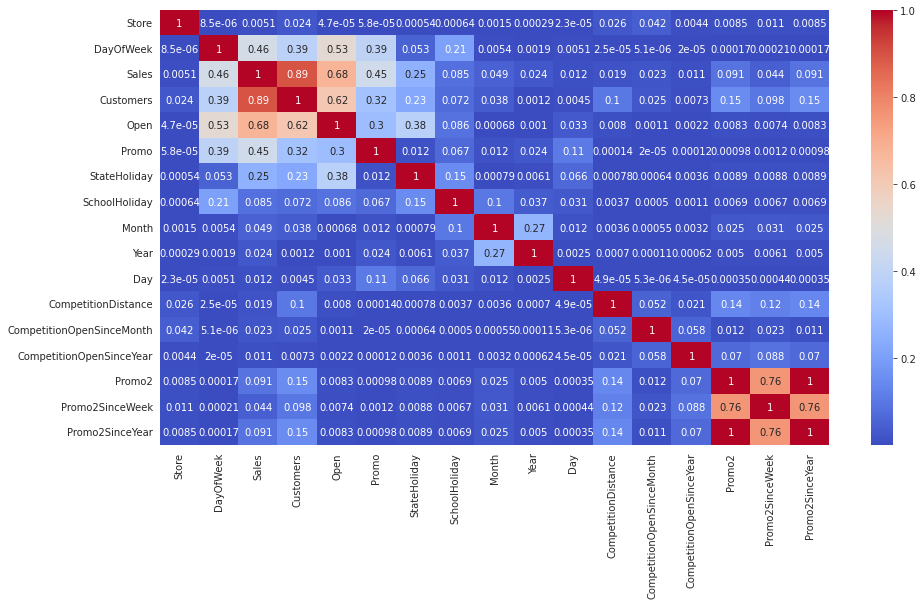

In [31]:
plt.figure(figsize=(15,8))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [32]:
numeric_features = df.describe().columns
numeric_features

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Month', 'Year', 'Day',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear'],
      dtype='object')

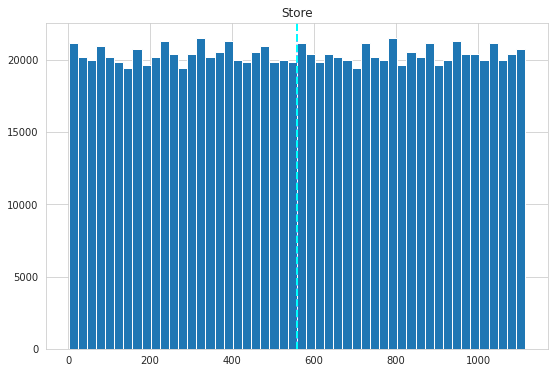

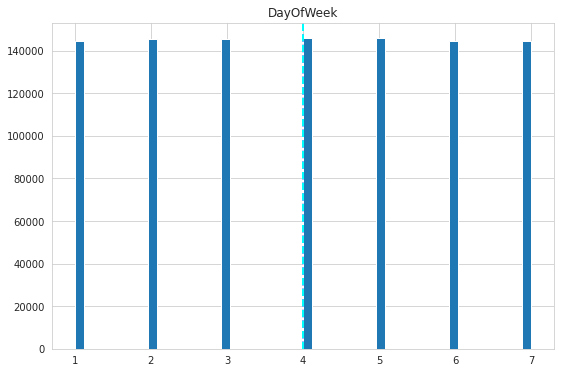

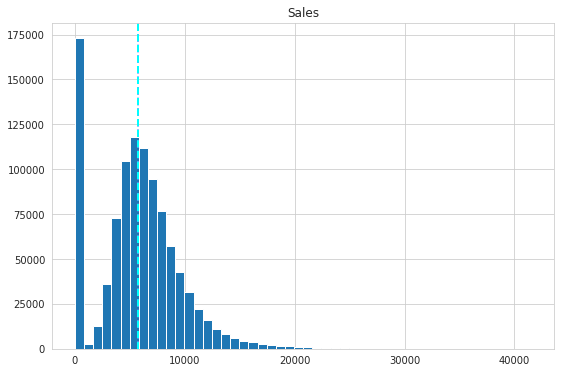

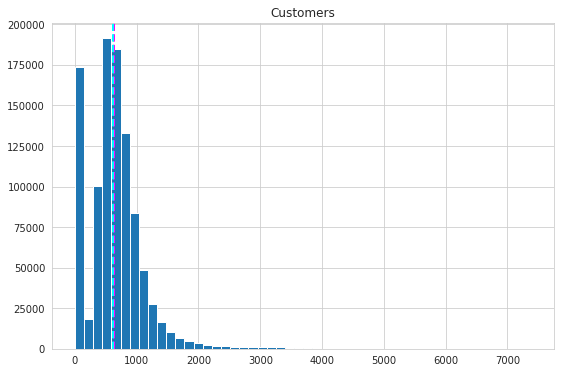

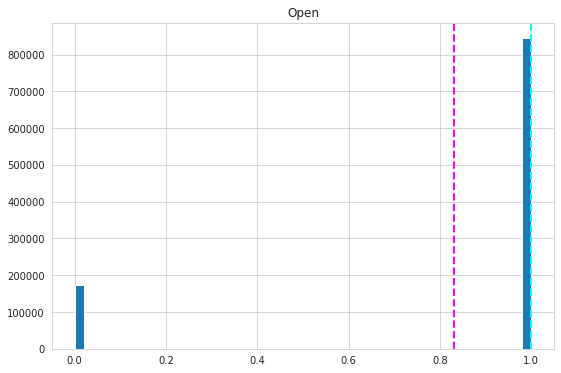

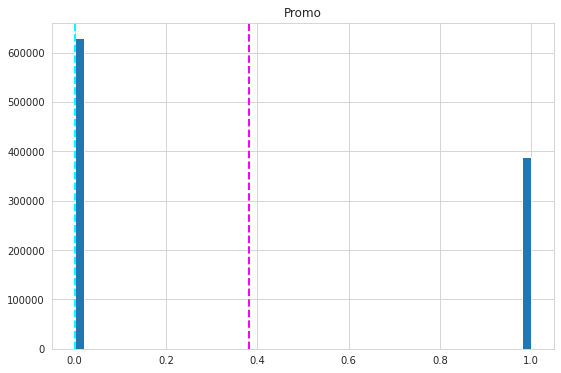

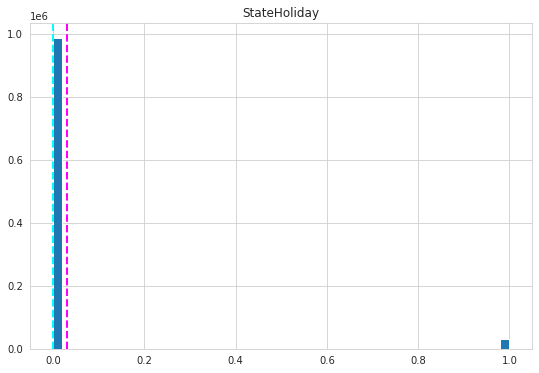

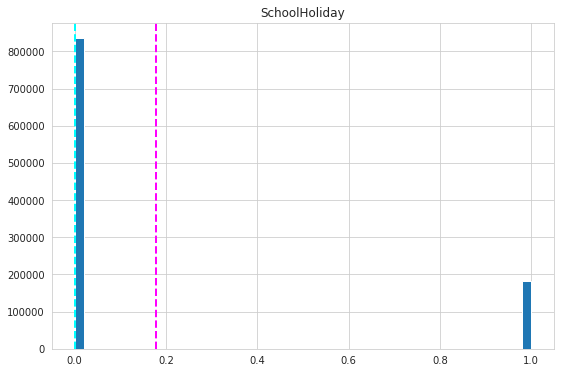

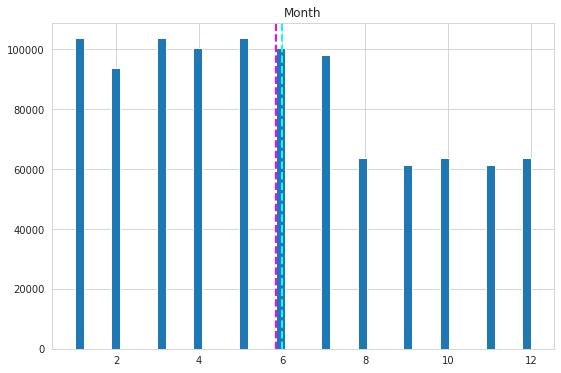

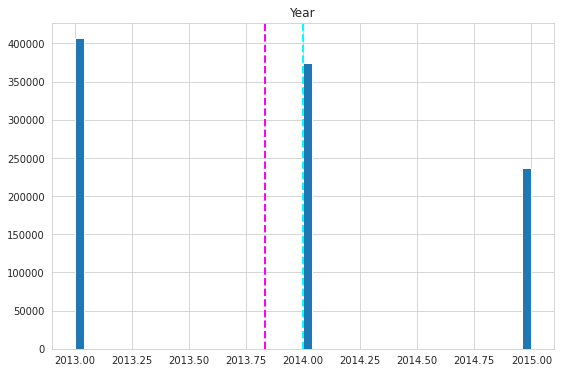

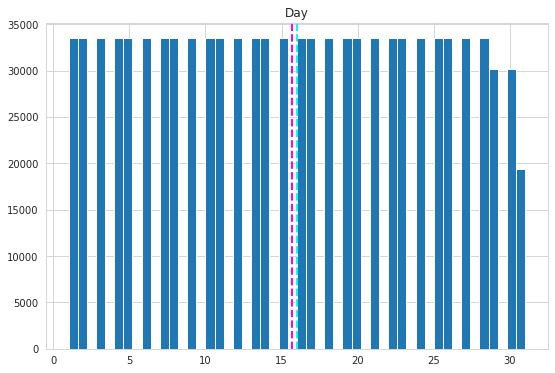

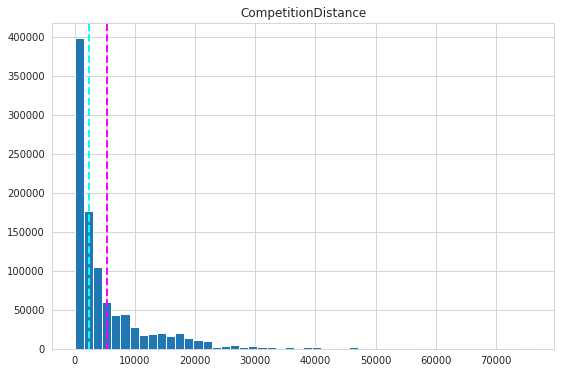

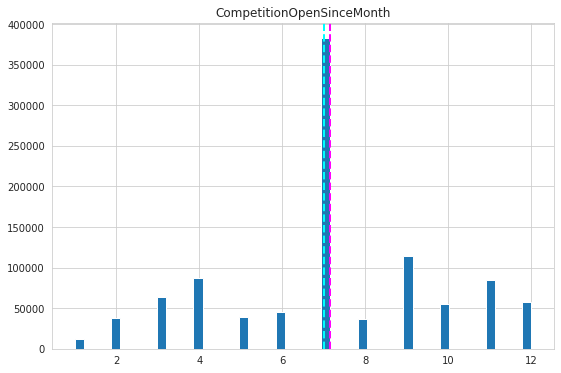

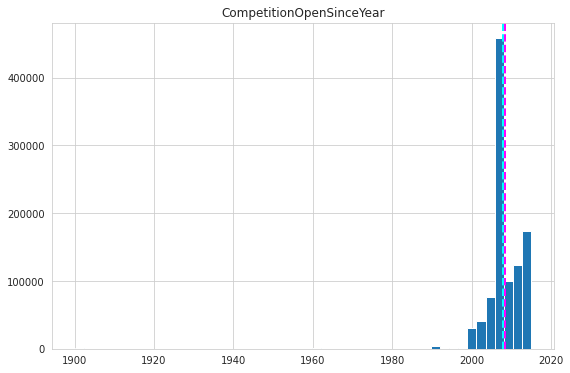

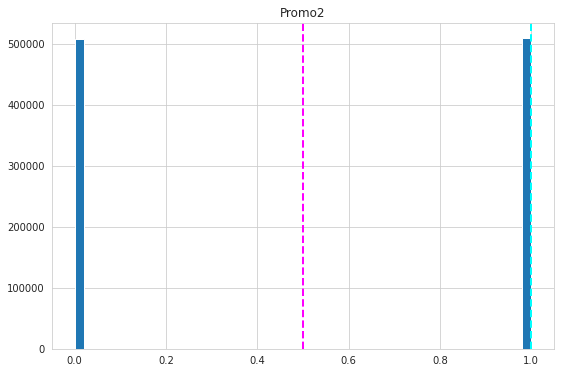

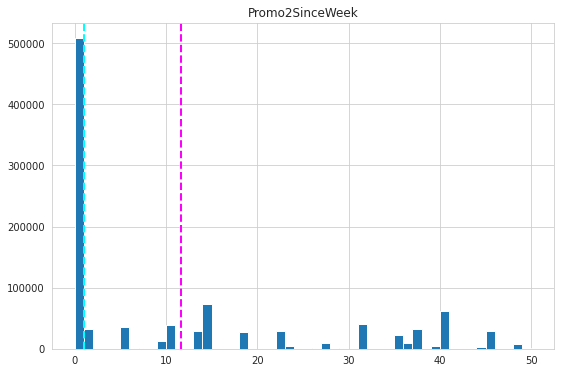

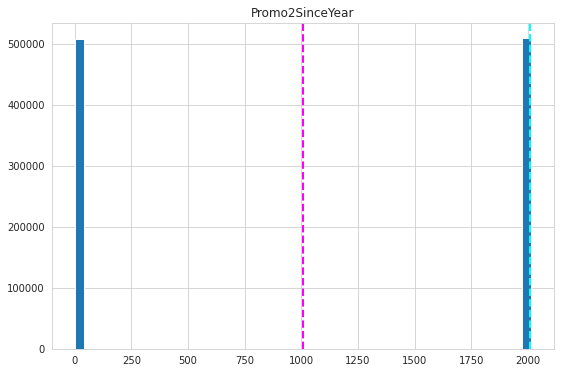

In [33]:
for col in numeric_features[:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

In [34]:
skewed_features = ['Sales','Customers','CompetitionDistance','CompetitionOpenSinceYear']

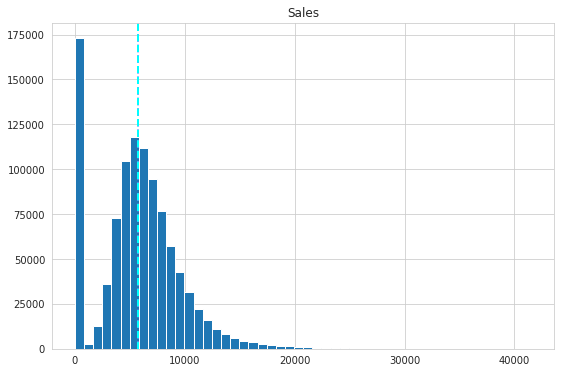

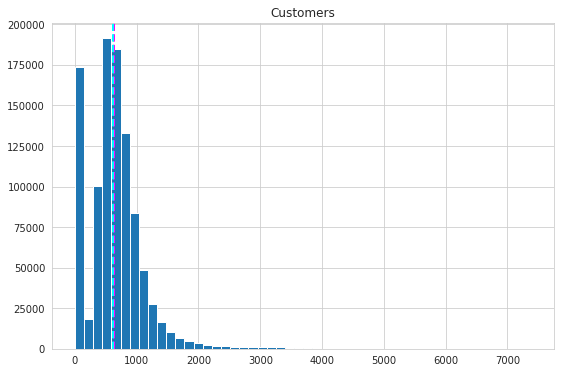

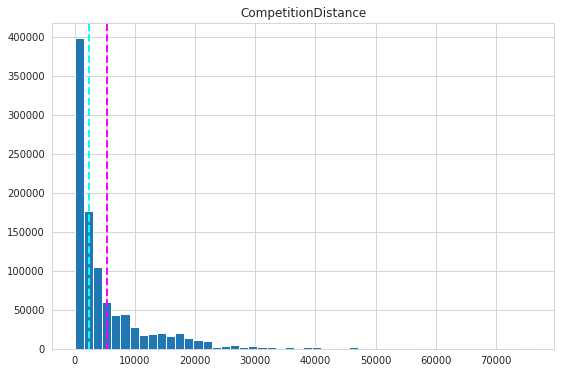

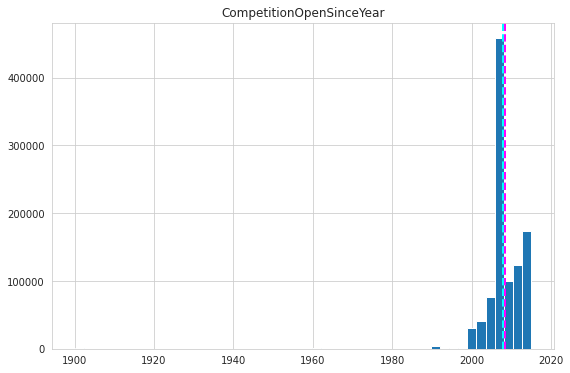

In [35]:
for col in skewed_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

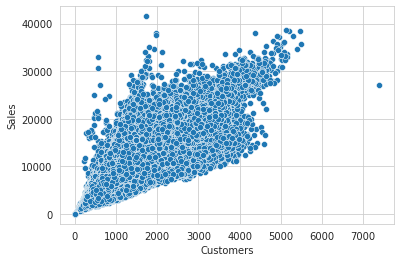

In [36]:
sns.scatterplot(x='Customers' , y='Sales' , data=df)

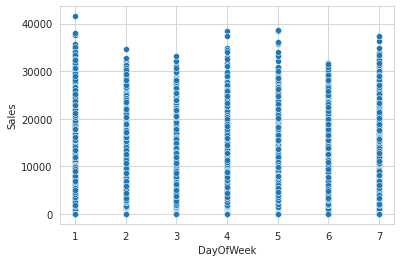

In [37]:
sns.scatterplot(x='DayOfWeek' , y='Sales' , data=df)

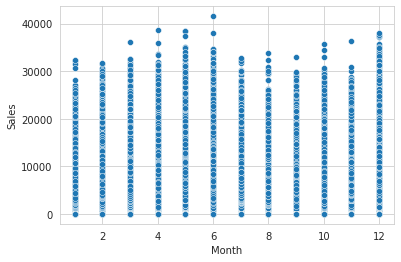

In [38]:
sns.scatterplot(x='Month' , y='Sales' , data=df)

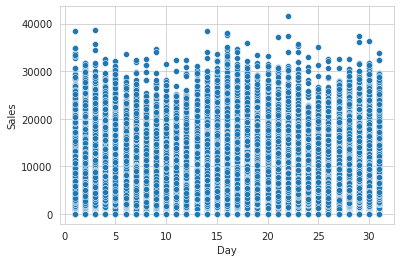

In [39]:
sns.scatterplot(x='Day' , y='Sales' , data=df)

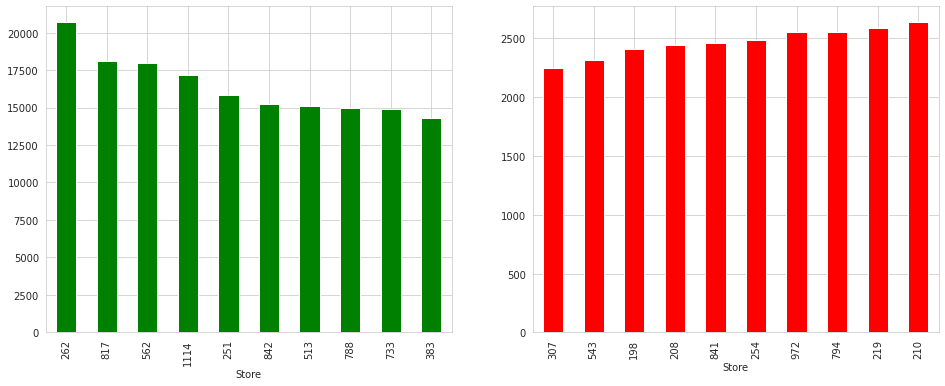

In [40]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

((df.groupby(['Store'])['Sales'].mean())).sort_values(ascending = False).head(10).plot.bar(color = 'green'  , ax=axes[0])
((df.groupby(['Store'])['Sales'].mean())).sort_values(ascending = True).head(10).plot.bar(color = 'red' , ax=axes[1])

In [41]:
df.groupby('Open')['Sales'].mean()

Open
0       0.000000
1    6955.514291
Name: Sales, dtype: float64

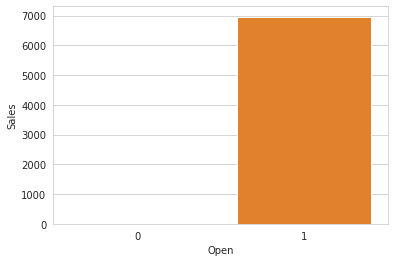

In [42]:
sns.barplot(x='Open' , y='Sales' , data=df );

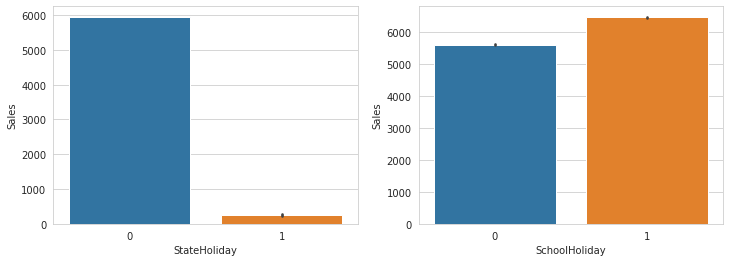

In [43]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.barplot(x='StateHoliday', y='Sales',data=df, ax=axes[0]);
sns.barplot(x='SchoolHoliday', y='Sales',data=df, ax=axes[1]);

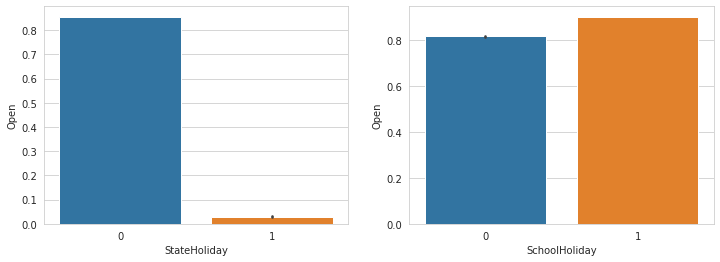

In [44]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.barplot(x='StateHoliday', y='Open',data=df, ax=axes[0]);
sns.barplot(x='SchoolHoliday', y='Open',data=df, ax=axes[1]);

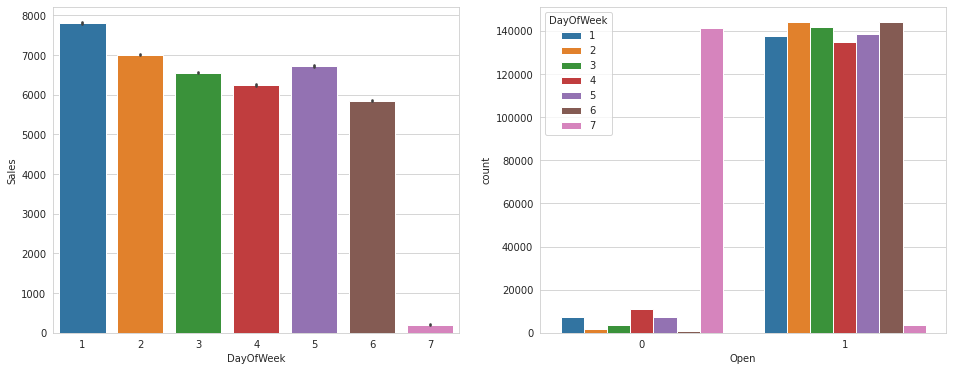

In [45]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

sns.barplot(x='DayOfWeek', y='Sales',data=df, ax=axes[0]);
sns.countplot(x='Open' , hue='DayOfWeek',data=df, ax=axes[1]);

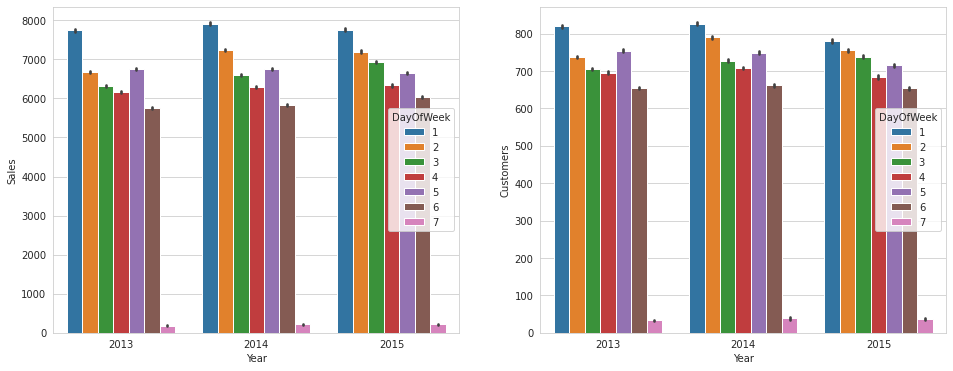

In [46]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

sns.barplot(x='Year', y='Sales' , hue='DayOfWeek',data=df, ax=axes[0]);
sns.barplot(x='Year' , y='Customers', hue='DayOfWeek',data=df, ax=axes[1]);

In [47]:
df.groupby('Promo')['Sales'].mean()

Promo
0    4406.050805
1    7991.152046
Name: Sales, dtype: float64

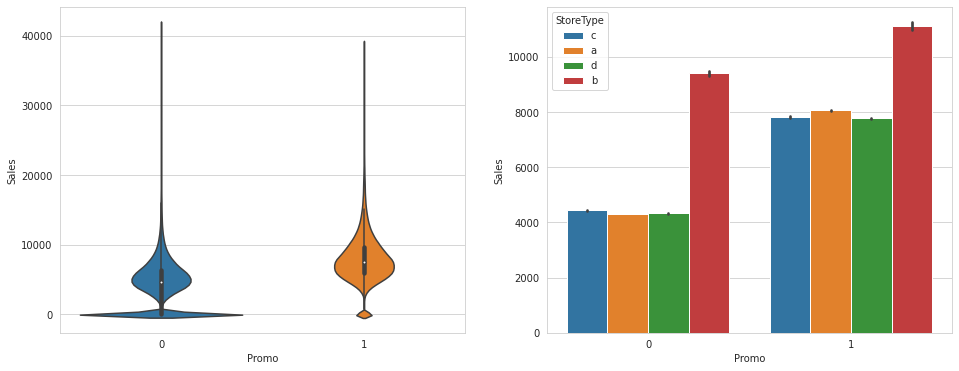

In [48]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

sns.violinplot(x='Promo', y='Sales', data=df , ax=axes[0]);
sns.barplot(x='Promo' , y='Sales', hue='StoreType',data=df, ax=axes[1]);

StoreType
a     5738.179710
b    10058.837334
c     5723.629246
d     5641.819243
Name: Sales, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


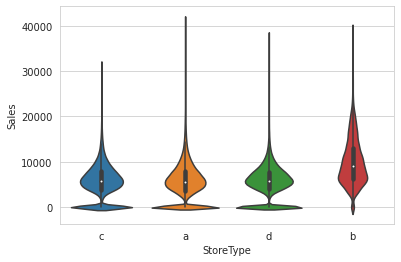

In [49]:
print(df.groupby('StoreType')['Sales'].mean())
print(sns.violinplot( x='StoreType' , y='Sales' , data=df))

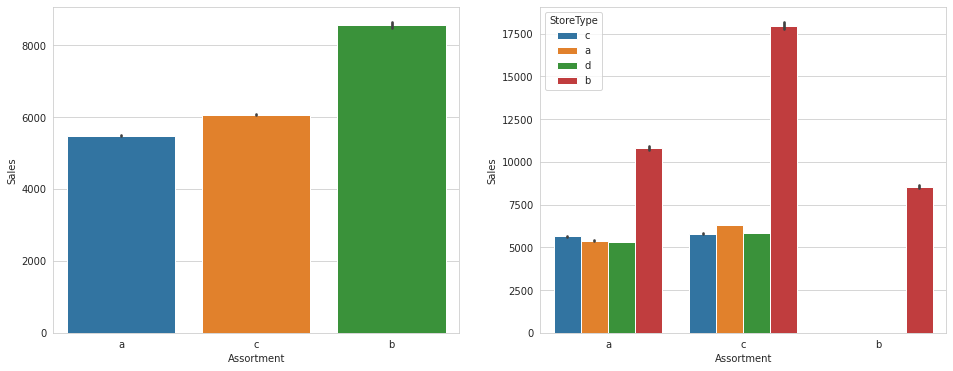

In [50]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.barplot(x='Assortment', y='Sales', data=df , ax = axes[0])
sns.barplot(x='Assortment', y='Sales', data=df ,hue="StoreType", ax = axes[1])

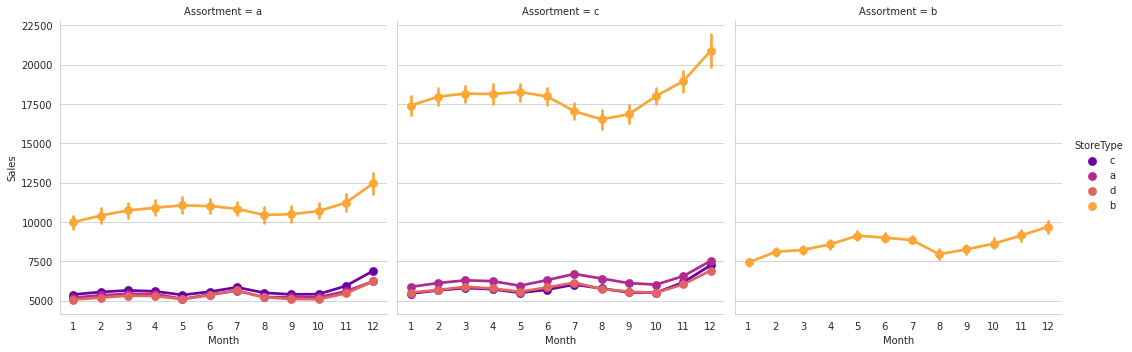

In [51]:
sns.factorplot(data = df, x = 'Month', y = "Sales", 
               col = 'Assortment',
               palette = 'plasma',
               hue = 'StoreType')

# **Feature Selection**
After the EDA process, we move on to the feature selection process.
Feature selection will be done on both **Numerical and Categorical columns.**
We will consider date,month,week as it has many categories.
Feature selection on numerical columns.

In [52]:
columns= ['Customers','Month','Day','CompetitionDistance', 'CompetitionOpenSinceMonth' , 'CompetitionOpenSinceYear' , 'Promo2SinceWeek' , 'Sales' ]


In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [54]:
calc_vif(df[[i for i in columns]])

,variables,VIF
0,Customers,15.282572
1,Month,4.104995
2,Day,4.195076
3,CompetitionDistance,1.597812
4,CompetitionOpenSinceMonth,8.291103
5,CompetitionOpenSinceYear,18.758797
6,Promo2SinceWeek,1.650643
7,Sales,17.024498


Removing CompetitionDistance,CompetitionOpenSinceMonth, CompetitionOpenSinceYear since it has very low correlation with independent variable sales (<0.03)

In [55]:
columns= ['Customers','Month','Day', 'Promo2SinceWeek' , 'Sales' ]
calc_vif(df[[i for i in columns]])

,variables,VIF
0,Customers,14.551426
1,Month,2.939733
2,Day,2.873800
3,Promo2SinceWeek,1.483269
4,Sales,16.046747


Month, day, promo2sinceweek also have low correlation with sales ( <0.05) hence we will remove them

In [56]:
columns= ['Customers','Sales' ]
calc_vif(df[[i for i in columns]])

,variables,VIF
0,Customers,14.319467
1,Sales,14.319467


# **Feature selection on categorical columns**

In [57]:
categorical_columns= [ 'DayOfWeek' , 'Open' , 'Promo' , 'StateHoliday' , 'SchoolHoliday' , 'Year' , 'StoreType' , 'Assortment' , 'Promo2' ]

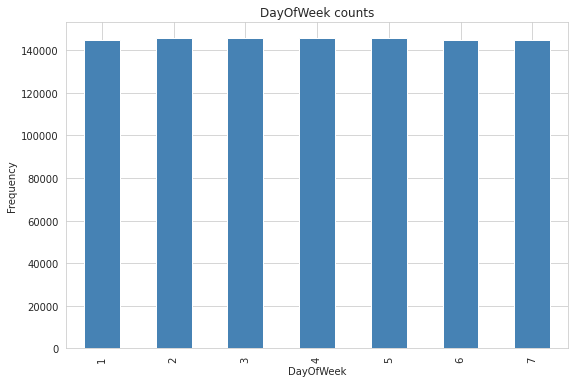

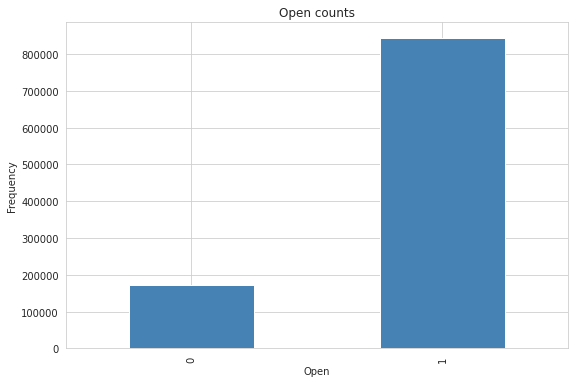

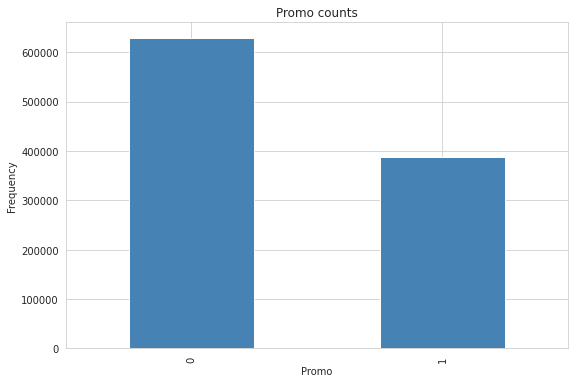

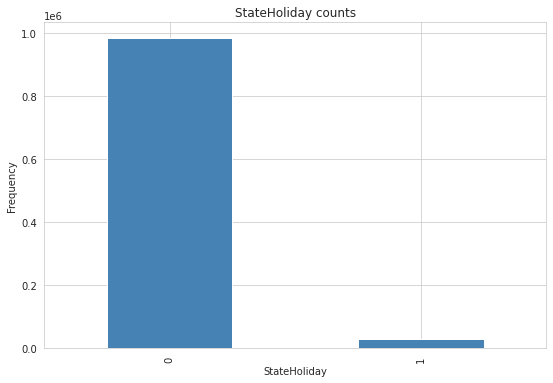

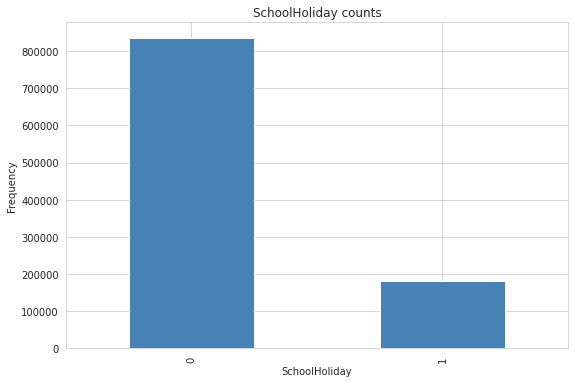

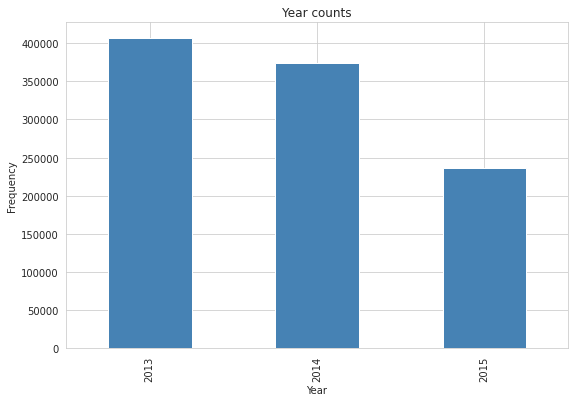

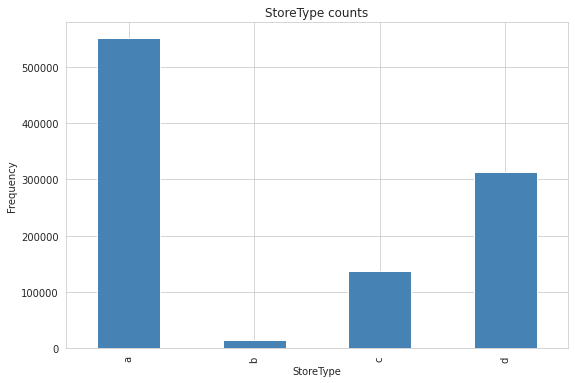

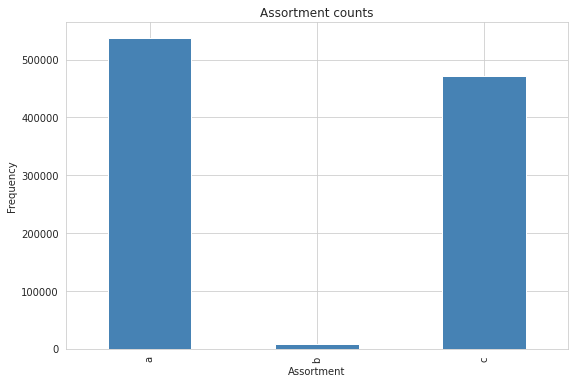

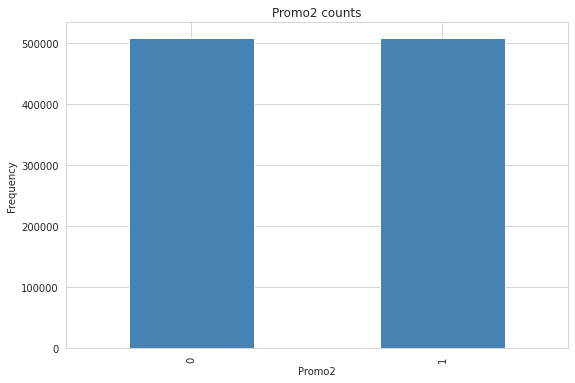

In [58]:
for col in categorical_columns:
    counts = df[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

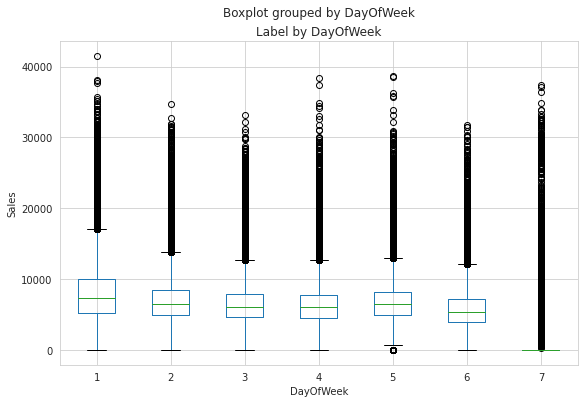

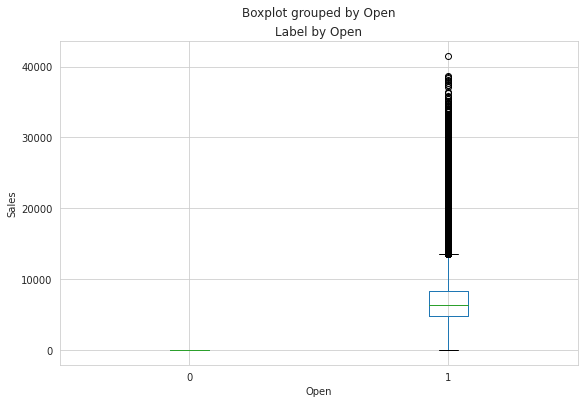

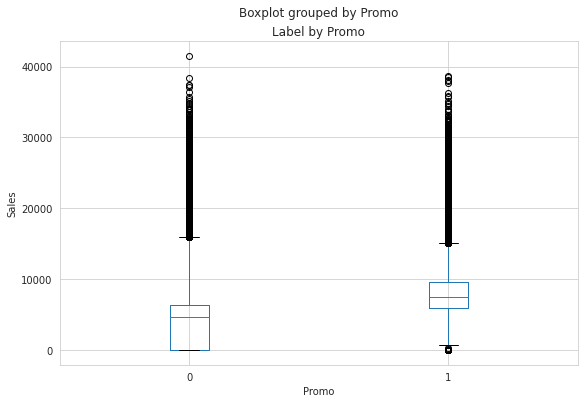

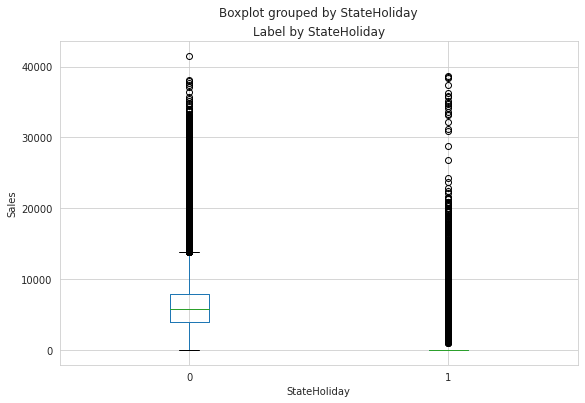

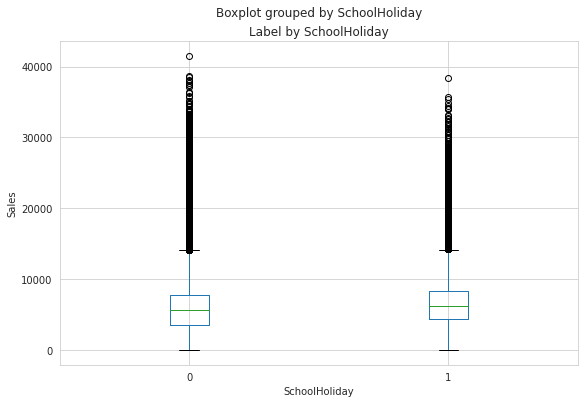

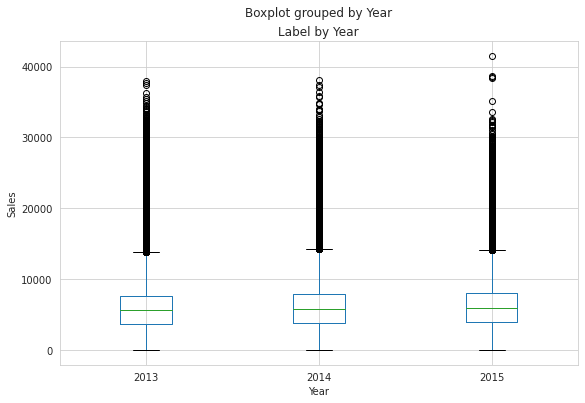

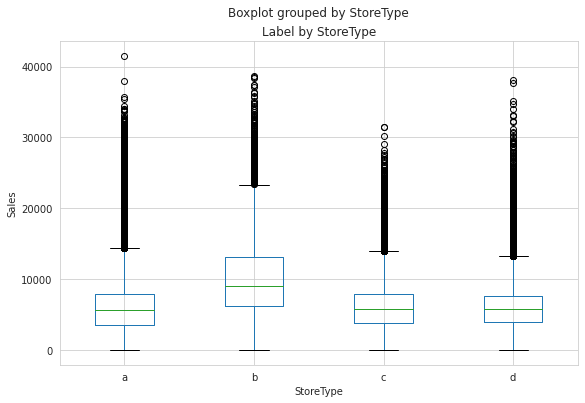

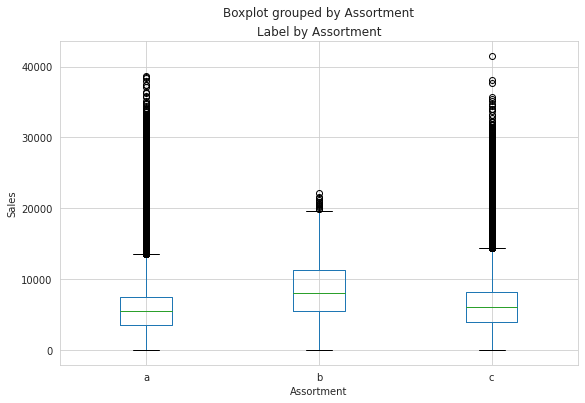

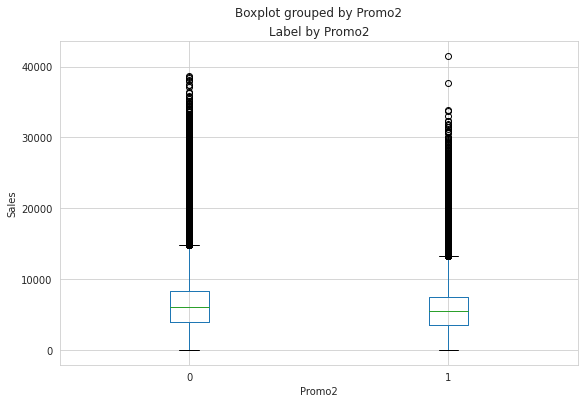

In [59]:
for col in categorical_columns:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    df.boxplot(column = 'Sales', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Sales")
plt.show()

In [60]:
final_columns = [ 'Customers', 'DayOfWeek' , 'Open' , 'Promo' , 'StateHoliday' , 'SchoolHoliday' , 'Year' , 'StoreType' , 'Assortment' , 'Promo2', 'PromoInterval' , 'Sales' ]


In [61]:
Sales_dataset = df[final_columns]

In [62]:
Sales_dataset.head()

,Customers,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,Year,StoreType,Assortment,Promo2,PromoInterval,Sales
0,555,5,1,1,0,1,2015,c,a,0,0,5263
1,625,5,1,1,0,1,2015,a,a,1,"Jan,Apr,Jul,Oct",6064
2,821,5,1,1,0,1,2015,a,a,1,"Jan,Apr,Jul,Oct",8314
3,1498,5,1,1,0,1,2015,c,c,0,0,13995
4,559,5,1,1,0,1,2015,a,a,0,0,4822


# **One hot encoding for the needed columns**

In [63]:
Sales_dataset = pd.get_dummies(Sales_dataset, columns=["StoreType", "Assortment","PromoInterval"], prefix=["store_type", "assort_type","promo_Interval"])

In [64]:
Sales_dataset.head()

,Customers,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,Year,Promo2,Sales,store_type_a,store_type_b,store_type_c,store_type_d,assort_type_a,assort_type_b,assort_type_c,promo_Interval_0,"promo_Interval_Feb,May,Aug,Nov","promo_Interval_Jan,Apr,Jul,Oct","promo_Interval_Mar,Jun,Sept,Dec"
0,555,5,1,1,0,1,2015,0,5263,0,0,1,0,1,0,0,1,0,0,0
1,625,5,1,1,0,1,2015,1,6064,1,0,0,0,1,0,0,0,0,1,0
2,821,5,1,1,0,1,2015,1,8314,1,0,0,0,1,0,0,0,0,1,0
3,1498,5,1,1,0,1,2015,0,13995,0,0,1,0,0,0,1,1,0,0,0
4,559,5,1,1,0,1,2015,0,4822,1,0,0,0,1,0,0,1,0,0,0


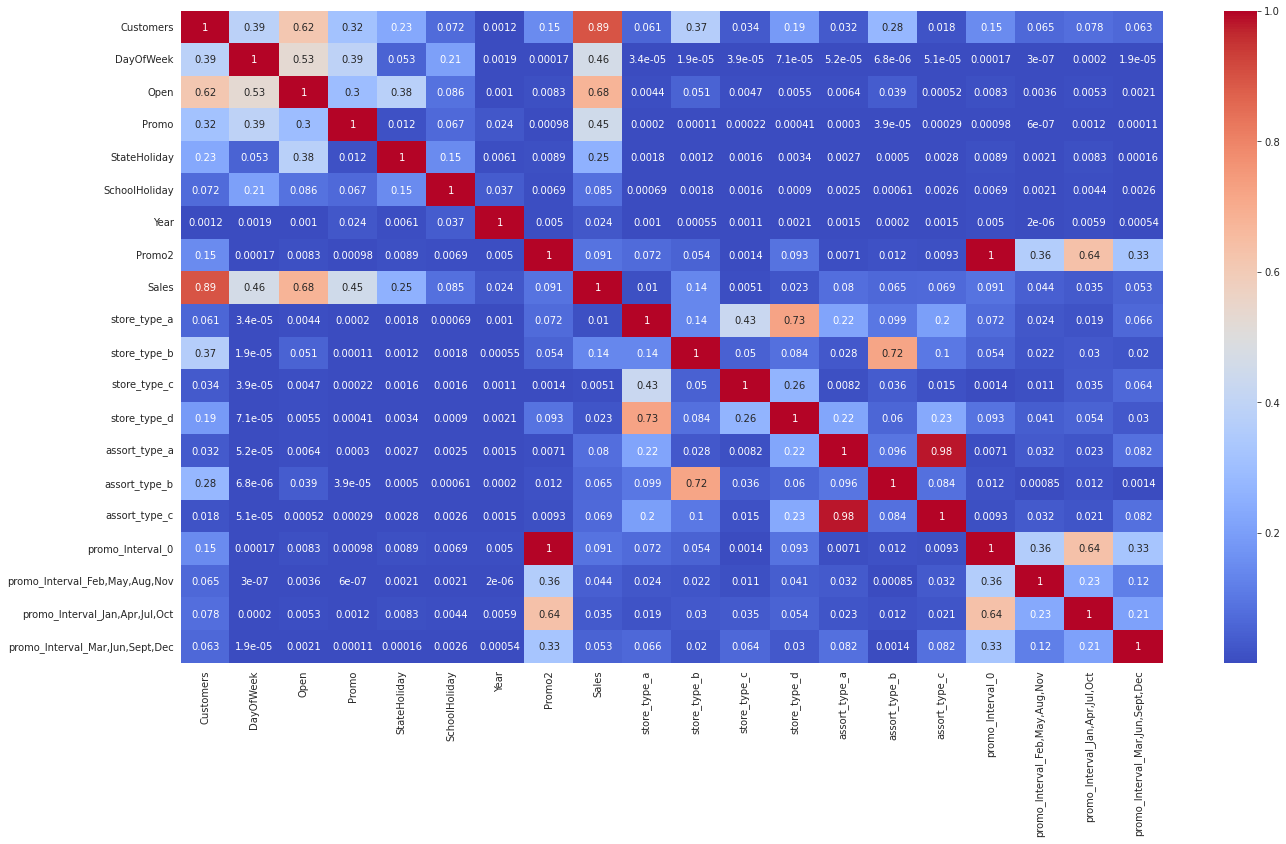

In [65]:
plt.figure(figsize=(22,12))
correlation = Sales_dataset.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [66]:
Sales_dataset = Sales_dataset.apply(pd.to_numeric)

In [67]:
Sales_dataset['Sales'] = Sales_dataset['Sales'].astype(float)

In [68]:
X = Sales_dataset.loc[:,Sales_dataset.columns != 'Sales']
Y = Sales_dataset['Sales']

In [69]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [70]:
X_train.head()

,Customers,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,Year,Promo2,store_type_a,store_type_b,store_type_c,store_type_d,assort_type_a,assort_type_b,assort_type_c,promo_Interval_0,"promo_Interval_Feb,May,Aug,Nov","promo_Interval_Jan,Apr,Jul,Oct","promo_Interval_Mar,Jun,Sept,Dec"
635787,648,1,1,0,0,0,2013,1,0,0,1,0,1,0,0,0,0,1,0
621011,0,7,0,0,0,0,2013,0,0,0,0,1,0,0,1,1,0,0,0
69929,476,6,1,0,0,0,2015,0,0,0,0,1,1,0,0,1,0,0,0
53248,0,7,0,0,0,0,2015,1,1,0,0,0,1,0,0,0,1,0,0
658989,557,1,1,1,0,0,2013,0,0,0,0,1,0,0,1,1,0,0,0


In [71]:
print(Sales_dataset.size)
print(X_train.size)
print(Y_train.size)

20344180
15461573
813767


In [72]:
print(X_test.size)
print(Y_test.size)

3865398
203442


# **Implementing different machine learning models**

# **Linear Regression**

In [73]:
regressor = LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

In [74]:
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

def rmse(x, y):
    return sqrt(mean_squared_error(x, y))

In [75]:
def mse(x,y):
  return(mean_squared_error(x, y))

In [76]:
y_pred_train = regressor.predict(X_train)

In [77]:
y_pred_train[0:10]

array([5334.61367234,  649.74324033, 4923.30776133, -218.10533337,
       6961.4434935 , 6636.9288958 , 7536.06015087, 4800.17669856,
       5100.44189005, 7539.74945363])

In [78]:
Y_train[0:10]

635787    6394.0
621011       0.0
69929     5369.0
53248        0.0
658989    7288.0
663725    7435.0
717492    5128.0
244369    5122.0
532487    4579.0
361392    6653.0
Name: Sales, dtype: float64

In [79]:
y_pred_test = regressor.predict(X_test)

In [80]:
rmse(Y_train,y_pred_train)

1229.7872713818672

In [81]:
rmse(Y_test,y_pred_test)

1225.7613138742954

In [82]:
mse(Y_test,y_pred_test)

1502490.7985908391

In [83]:
regressor.intercept_

-224049.29937370794

In [84]:
regressor.coef_

array([    7.20611639,   -48.5522104 ,   891.2295442 ,  1115.35061952,
        -573.57552761,    60.69349502,   110.28873888,    59.9981665 ,
         589.36847264, -2568.01090624,   446.35655107,  1532.28588254,
        1238.48288653, -2793.87188421,  1555.38899767,   -59.9981665 ,
          51.40113658,   115.60331685,  -107.00628693])

# **Evaluation Metrics for Linear Regression**

In [85]:
print("Mean Squared Error:", mse(Y_test,y_pred_test))
print("Root of Mean Squared Error (training performance):",rmse(Y_train,y_pred_train))
print("Root of Mean Squared Error (testing performance):",rmse(Y_test,y_pred_test))
print("Linear Regression training score:", regressor.score(X_train,Y_train))
print("Linear Regression testing score:" ,regressor.score(X_test,Y_test))
print("r2 score train:",r2_score(Y_train, y_pred_train))
print("r2 score test:",r2_score(Y_test,y_pred_test))

Mean Squared Error: 1502490.7985908391
Root of Mean Squared Error (training performance): 1229.7872713818672
Root of Mean Squared Error (testing performance): 1225.7613138742954
Linear Regression training score: 0.8980411353747675
Linear Regression testing score: 0.8983205251368941
r2 score train: 0.8980411353747675
r2 score test: 0.8983205251368941


# **Lasso Regularization** 

In [86]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.1 , max_iter= 3000)
lasso.fit(X_train, Y_train)

Lasso(alpha=0.1, max_iter=3000)

In [87]:
y_pred_train_lasso = lasso.predict(X_train)
y_pred_test_lasso = lasso.predict(X_test)

In [88]:
print("Training Rmse:",rmse(Y_train,y_pred_train_lasso))
print("R2 score train:",r2_score(Y_train,y_pred_train_lasso))

Training Rmse: 1229.7881437185613
R2 score train: 0.8980409907278151


In [89]:
print("Testing Rmse:",rmse(Y_test,y_pred_test_lasso))
print("R2 score test:",r2_score(Y_test,y_pred_test_lasso))

Testing Rmse: 1225.765065461762
R2 score test: 0.8983199027318256


In [91]:
### Cross validation
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [92]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-13}

Using  {'alpha': 1e-13}  the negative mean squared error is:  -1512466.6862644872


In [93]:
print("MSE score for lasso :", mse(Y_test,y_pred_test_lasso))
print("RMSE score for lasso: ",rmse(Y_test,y_pred_test_lasso))
print("R2 score for lasso: ",r2_score(Y_test,y_pred_test_lasso))

MSE score for lasso : 1502499.995706478
RMSE score for lasso:  1225.765065461762
R2 score for lasso:  0.8983199027318256


**Decision Tree**

In [94]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(min_samples_leaf=10)
treereg = tree.fit(X_train, Y_train)